# Итоговая работа.

In [58]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline
from scipy.optimize import curve_fit

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


#### РЕШЕНИЕ ЗАДАНИЯ 1:

In [2]:
### YOUR CODE HERE
from scipy.misc import derivative #для подсчета производной 

def func(x):
    return np.tan(np.sin(x) + np.cos(2*x+3))**2
x = 1
print('Производная функции в точке X\u2080: ', derivative(func, 1.0, n=1))# считаем производную, указывая функцию, значение х (1.0) и порядок производной (n=1)


Производная функции в точке X₀:  57.06531269460301


## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

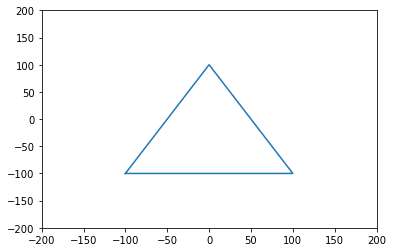

In [43]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1.2)


#### РЕШЕНИЕ ЗАДАНИЯ 2:

In [56]:
A1 = A + [200, 300, 0] # смещаем матрицу на указанные величины вынес в отдельную ячейку ля удобства

На  вский случай сделал три варианта:
   - смещение
   - трансформация
   - смещение и трансформация

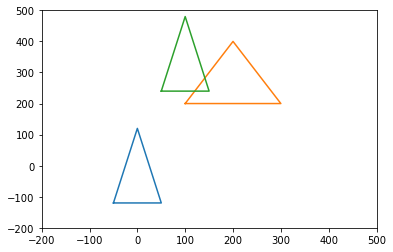

In [55]:

trans_mat = np.array([[0.5,0,0],[0,1.2,0],[0,0,1]])

transf = trans_mat@A.transpose()
transform = transf.transpose()
transf_move = trans_mat@A1.transpose()
transform_and_move = transf_move.transpose()


x = transform[:,0]
y = transform[:,1]
plt.plot(x, y)
plt.ylim([-200, 400])
plt.xlim([-200, 400]) 
x1 = A1[:,0]
y1 = A1[:,1]
plt.plot(x1, y1)
plt.ylim([-200, 400])
plt.xlim([-200, 400])
x2 = transform_and_move[:,0]
y2 = transform_and_move[:,1]
plt.plot(x2, y2)
plt.ylim([-200, 500])
plt.xlim([-200, 500]) 
plt.show()

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [62]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


#### РЕШЕНИЕ ЗАДАНИЯ 3:

In [9]:
self_value, self_matrix = np.linalg.eig(m)
print('собственные значения: ', self_value, '\n')

print('собственный вектор: \n',self_matrix)

собственные значения:  [ 3. -1.] 

собственный вектор: 
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [119]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [60]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

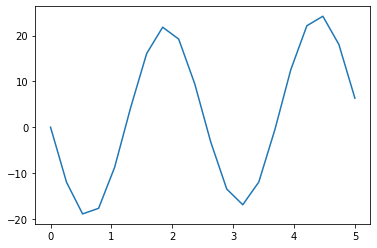

In [133]:
plt.plot(x, fx)
plt.show()

In [63]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))


#### ВОПРОС:

если честно, не понял, как решать данную задачу, поскольку вышестоящая функция меня очень смущает. Что такое params? Предполагается, что я должен внести туда предполагаемые мною значения? Я посмотрел в ДЗ, где мы реализовывали подобную задачу. Там был код:

    > def f(x, a, b):
    > return np.e**a * np.sin(b*x) + x
    > p0 = [0.5,0.6]
    > res = curve_fit(f, x, y, p0 = p0, method = 'trf')
    > res
Но когда я пытаюсь вместо f подставить errors, а вместо y - fx, мне выдается ошибка, что функция errors берет только один аргумент, а дано три.
В общем, ничего не понятно, но очень интересно. И поскольку для зачета требуется решение 4/5, то прошу зачесть, ибо сил уже нет

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [64]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

#### РЕШЕНИЕ ЗАДАНИЯ 5:

In [65]:
### YOUR CODE HERE
def angle_between(v1, v2):
    scalar_value = v1.dot(v2)
    norms = np.linalg.norm(v1) * np.linalg.norm(v2)
 
    return np.rad2deg(np.arccos(scalar_value / norms))


In [75]:
x = ''
dict_ = {}
for i, rate1 in enumerate(raitings):
    minimum = 50
    b = 0
    for j, rate2 in enumerate(raitings):
        if i != j:
            b =  round(angle_between(rate1, rate2),4)
            if b < minimum:
                minimum = b
                x = 'user ' + str(i+1) + ' and user ' +  str(j+1) # i+1 в данном случае сделано ислючительно ля наглядности, покольку пользователь 0 звучит странно
    dict_[x] = minimum 
dict_                
            

{'user 1 and user 9': 24.4033,
 'user 2 and user 5': 29.3805,
 'user 3 and user 10': 23.2588,
 'user 4 and user 10': 30.8102,
 'user 5 and user 9': 28.4197,
 'user 6 and user 10': 31.2238,
 'user 7 and user 4': 33.6185,
 'user 8 and user 6': 32.3798,
 'user 9 and user 1': 24.4033,
 'user 10 and user 3': 23.2588}